# Progetto Programmazione Data Intesive

# League of Legends
League of Legends è un videogioco Multiplayer Online Battle Arena (MOBA). Dieci giocatori divisi in due squadre combattono tra di loro per distruggere la base nemica.
Per gli scopi di questo progetto il riassunto del gioco non sarà esaustivo e eviterà di menzionare aspetti non inerenti al nostro studio.

La mappa su cui si svolge il gioco è la seguente

<img src="assets/league_of_legends_map.jpg" width=600/>

# In foto sono evidenziati:
## Nexus
Il Nexus è il cuore della base di una squadra, in foto è la gemma che si trova in basso a sinistra e in alto a destra per la squadra blu e rossa, rispettivamente. Il Nexus è protetto da tre inhibitor.

## Inhibitor
L'inhibitor è una struttura il cui scopo è proteggere il nexus. Una volta distrutto anche un solo inhibitor il Nexus viene scoperto e diventa vulnerabile ad attacchi nemici. Gli inhibitor sono protetti dalle torri presenti nelle lane.

## Lane
Ci sono tre corsie (lane) che partono dalla base blu e arrivano alla rossa, una in cima, in mezzo e in basso. Le corsie sono spesso occupate da giocatori che la difendono, in quanto per corsia sono presenti 2 torri per ciascuna squadra che proteggono gli Inhibitor. Una volta distrutte le due torri appartenenti ad una squadra in una lane, diventa vulnerabile l'inhibitor.

## Torre
La torre  è una struttura il cui scopo è proteggere la lane, per avanzare una squadra deve distruggere le torri presenti sulla lane per avanzare all'inhibitor

## Giungla
Tutto il territorio presente in mezzo alle lane, contiene mostri e obbiettivi. Gli obbiettivi appaiono a periodi prefissati nella partita, i principali sono: 

- ### Drake
    Un drago appare periodicamente in basso a destra nella giungla, la squadra che lo sconfigge ottiene dei bonus

- ### Rift Herald
    Un Rift Herald appare periodicamente verso inizio partita in alto a sinistra sulla mappa, la squadra che lo sconfigge può evocarlo per distruggere le torri nemiche

- ### Baron
  Il Baron appare periodicamente verso fine partita, la squadra che lo sconfigge ottiene dei bonus temporanei

## Sintesi
Una squadra per vincere deve penetrare le difese di almeno una lane (torri), distruggere l'inhibitor ad esso associata e finire distruggendo il Nexus. 

## Scopo del progetto
Lo scopo del progetto è quello di studiare e trovare correlazioni e probabilità associate ai vari aspetti di una partita di League of Legends.

In [1]:
import os
from urllib.request import urlretrieve
from zipfile import ZipFile

# constants
URL = "https://www.kaggle.com/api/v1/datasets/download/datasnaek/league-of-legends"
DATA_DIR = "data/"
ZIP_NAME = "compressed.zip"

if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

os.chdir(os.path.join(os.getcwd(), DATA_DIR))

if not os.path.exists(ZIP_NAME):
    # scarica il file dall'URL indicato
    urlretrieve(URL, ZIP_NAME)
    # apri il file zip ed estrai tutto il contenuto nella directory corrente
    with ZipFile(ZIP_NAME) as f:
        f.extractall()

In [68]:
import pandas as pd

games_data = pd.read_csv("games.csv")

In [3]:
import json

def jsonReader(filePath): 
    # Carica il file
    with open(filePath, "r", encoding="utf-8") as f:
        data = json.load(f)
    
    # Accedi alla parte utile dei dati (data["data"] è un dizionario con campioni)
    readed_data = data["data"]
    
    # Trasforma il dizionario in DataFrame
    return pd.DataFrame.from_dict(readed_data, orient="index")

df_champions_keyID = jsonReader("champion_info.json");
df_champions_nameID = jsonReader("champion_info_2.json");


In [4]:
# L'anima del drago è un bonus che riceve una squadra se ha ucciso almeno quattro draghi.
games_data["t1_hasDragonSoul"] = games_data["t1_dragonKills"] >= 4
games_data["t2_hasDragonSoul"] = games_data["t2_dragonKills"] >= 4

# Caricamento dei dati
_gamesData_ è composto da:
- `gameId`: Riferimento univoco ad una partita
- `creationTime`: Il momento in cui è stata creata la partita (in Epoch format)
- `gameDuration`: Durata del game (in secondi)
- `seasonId`: ID di sessione

-  Winner (1 = team1, 2 = team2)
  `winner`: Quale delle due squadre ha vinto la partita
- First Baron, dragon, tower, blood, inhibitor and Rift Herald (1 = team1, 2 = team2, 0 = none)
- `firstBlood`: Quale delle due squadre ha effettuato la prima uccisione ()
- `firstTower`: Quale delle due squadre ha distrutto la prima torre avversaria
- `firstInhibitor`: Quale delle due squadre ha distrutto prima un'inibitore 
- `firstBaron`: Quale delle due squadre ha ucciso il primo Barone (nemico Obbiettivo)
- `firstDragon`: Quale delle due squadre ha ucciso il primo Drago (nemico Obbiettivo)
  
- *I Prossimi parametri sono speculari per la squadra due, presentatando però
  ilprefisso 't2_'*
- `t1_champ1id`: ID del campione del giocatore 1 della prima squadra
  *Ciascun campione può sceglie tra due abilità comuni a tutti gli altri (dati presenti in summoner_spell_info.json*
  - `t1_champ1_sum1`: ID della prima summoner spell
  - `t1_champ1_sum2`: ID delle seconda summoner spell
- `t1_champ2id`: ID del campione del giocatore 2 della prima squadra
- `t1_champ3id`: ID del campione del giocatore 3 della prima squadra
- `t1_champ4id`: ID del campione del giocatore 4 della prima squadra
- `t1_champ5id`: ID del campione del giocatore 5 della prima squadra
- `t1_towerKills`: Numero di torri distrutte dalla squadra 1
- `t1_inhibitorKills`: Numero di inibitori distrutti dalla squadra 1
- `t1_baronKills`: Numero di baroni uccisi dalla squadra 1
- `t1_dragonKills`: Numero di draghi uccisi nella squadra 1
- `t1_riftHeraldKills`: Mostro che rappresenta un'obbiettivo, una volta sconfitto va ad attaccare torri nemiche
- `t1_ban1`: Eroe proibito da giocatore 1 della squadra 1, questo eroe non potra essere selezionato in questa partita
- `t1_ban2`: Eroe proibito da giocatore 2 della squadra 1
- `t1_ban3`: Eroe proibito da giocatore 3 della squadra 1
- `t1_ban4`: Eroe proibito da giocatore 4 della squadra 1
- `t1_ban5`: Eroe proibito da giocatore 5 della squadra 1 

## colonne derivate

- 't1_hasDragonSoul': Se la squadra 1 ha ottenuto l'anima del drago (ottenuta sconfiggendo 4 draghi in una partita)
- 't2_hasDragonSoul': Analogo per la squadra 2

In [5]:
games_data.head(5)

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5,t1_hasDragonSoul,t2_hasDragonSoul
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,0,1,1,114,67,43,16,51,False,False
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,0,0,0,11,67,238,51,420,False,False
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,0,1,0,157,238,121,57,28,False,False
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,164,18,141,40,51,False,False
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,0,1,0,86,11,201,122,18,False,False


In [6]:
df_champions_keyID.head(5)

,title,id,key,name
1,the Dark Child,1,Annie,Annie
2,the Berserker,2,Olaf,Olaf
3,the Colossus,3,Galio,Galio
4,the Card Master,4,TwistedFate,Twisted Fate
5,the Seneschal of Demacia,5,XinZhao,Xin Zhao


In [69]:
df_champions_nameID.tail(5)

,tags,title,id,key,name
KogMaw,"[Marksman, Mage]",the Mouth of the Abyss,96,KogMaw,Kog'Maw
Ahri,"[Mage, Assassin]",the Nine-Tailed Fox,103,Ahri,Ahri
Quinn,"[Marksman, Fighter]",Demacia's Wings,133,Quinn,Quinn
Leblanc,"[Assassin, Mage]",the Deceiver,7,Leblanc,LeBlanc
Ezreal,"[Marksman, Mage]",the Prodigal Explorer,81,Ezreal,Ezreal


# Analisi dei campioni

Ciascun giocatore, prima dell'inizio della partita, deve scegliere un campione da giocare. Il campione è unico per la partita e può essere giocato da un solo giocatore nel suo corso. In seguito metteremo a confronto tutti i campioni del gioco in un'indagine statistica.

## Calcolo Usage-Rate e Win-Rate di ciascun campione
Per iniziare l'analisi, poteva sembrarci interessante estrarre un dataset da games_data che contenesse
lo usage rate (quanto spesso un campione è stato scelto nella totalità delle partite), il win rate (la percentuale di vittoria di ciascun campione) e bannedChampion (la probalità di ciascun campione di venire bannato in una partita).

In [8]:
champIdColumns = ["t1_champ1id", "t1_champ2id", "t1_champ3id", "t1_champ4id", "t1_champ5id",
                 "t2_champ1id", "t2_champ2id", "t2_champ3id", "t2_champ4id", "t2_champ5id"]
bannedChamp = ["t1_ban1",	"t1_ban2",	"t1_ban3","t1_ban4", "t1_ban5", 
               "t2_ban1", "t2_ban2", "t2_ban3",	"t2_ban4",	"t2_ban5"]

In [9]:
campioni_vincenti = pd.concat([
    games_data.loc[games_data["winner"] == 1, champIdColumns[:5]],
    games_data.loc[games_data["winner"] == 2, champIdColumns[5:]]
])

# Campioni usati in partite perse
campioni_perdenti = pd.concat([
    games_data.loc[games_data["winner"] == 2, champIdColumns[:5]],
    games_data.loc[games_data["winner"] == 1, champIdColumns[5:]]
])
# Serie con numero di vittorie per ogni champ
serie_vittorie = pd.Series(campioni_vincenti.to_numpy().ravel()).value_counts()

# Serie con numero di sconfitte per ogni champ
serie_sconfitte = pd.Series(campioni_perdenti.to_numpy().ravel()).value_counts()

bannedChamps = pd.Series(games_data[bannedChamp].to_numpy().ravel()).value_counts()

champ_stats = pd.DataFrame({
    "partite_vinte": serie_vittorie,
    "partite_perse": serie_sconfitte,
    "numero_ban": bannedChamps
}).fillna(0).astype(int)

# Cambio alla colonna index nome 
champ_stats.index.name = "champion_id"

champ_stats = champ_stats.reset_index()
champ_stats = champ_stats.loc[champ_stats["champion_id"] != -1.0]

champ_stats = pd.merge(champ_stats, df_champions_nameID, how="left", left_on="champion_id", right_on="id")
champ_stats = champ_stats[["champion_id", "name", "title", "tags", "partite_vinte", "partite_perse", "numero_ban"]]

- Abbiamo quindi ottenuto un nuovo dataset con questi parametri di colonne:
   - champion_id
   - name
   - partite_vinte
   - partite_perse
   - numero_ban



In [10]:
champ_stats.head(5)

,champion_id,name,title,tags,partite_vinte,partite_perse,numero_ban
0,1.0,Annie,the Dark Child,[Mage],1647,1630,2108
1,2.0,Olaf,the Berserker,"[Fighter, Tank]",751,818,377
2,3.0,Galio,the Colossus,"[Tank, Mage]",1271,1446,2072
3,4.0,Twisted Fate,the Card Master,[Mage],1847,1743,284
4,5.0,Xin Zhao,the Seneschal of Demacia,"[Fighter, Assassin]",1674,1571,1357


A questo punto calcolo i dati derivati:
- winRateChamp
- PartiteTot
- UsageRate
- BanRate

In [11]:
champ_stats["winRateChamp"] = (champ_stats["partite_vinte"] / 
                (champ_stats["partite_vinte"] + champ_stats["partite_perse"]) * 100).round(2)
champ_stats["PartiteTot"] =(champ_stats["partite_vinte"] + champ_stats["partite_perse"])
champ_stats["UsageRate"] = ((champ_stats["PartiteTot"] / len(games_data.index)) * 100).round(2)

#Applichiamo la divisione per due in quanto un campione in ciascuna partita può venire bannato 2 volte, 
#cioè da entrambe le squadre
champ_stats["BanRate"] = ((champ_stats["numero_ban"] / len(games_data.index)/2) * 100).round(2)

Ordiniamo ora i risultati ottenuti per vedere quali campioni hanno una usage rate più alto

In [12]:
champ_stats.sort_values("UsageRate", ascending=False).head(10)

,champion_id,name,title,tags,partite_vinte,partite_perse,numero_ban,winRateChamp,PartiteTot,UsageRate,BanRate
129,412.0,Thresh,the Chain Warden,"[Support, Fighter]",6143,6859,5867,47.25,13002,25.25,5.70
17,18.0,Tristana,the Yordle Gunner,"[Marksman, Assassin]",6713,6270,13067,51.71,12983,25.21,12.69
60,67.0,Vayne,the Night Hunter,"[Marksman, Assassin]",5498,5160,9026,51.59,10658,20.70,8.76
108,141.0,Kayn,the Shadow Reaper,"[Fighter, Assassin]",4807,5046,17384,48.79,9853,19.14,16.88
59,64.0,Lee Sin,the Blind Monk,"[Fighter, Assassin]",4217,4971,6516,45.90,9188,17.84,6.33
28,29.0,Twitch,the Plague Rat,"[Marksman, Assassin]",4665,4173,15832,52.78,8838,17.16,15.37
39,40.0,Janna,the Storm's Fury,"[Support, Mage]",4826,3865,21390,55.53,8691,16.88,20.77
121,236.0,Lucian,the Purifier,[Marksman],3915,4385,1331,47.17,8300,16.12,1.29
117,202.0,Jhin,the Virtuoso,"[Marksman, Assassin]",3925,4119,1670,48.79,8044,15.62,1.62
119,222.0,Jinx,the Loose Cannon,[Marksman],4087,3893,880,51.22,7980,15.50,0.85


Oppure per winRate più alto

In [13]:
champ_stats.sort_values("winRateChamp", ascending=False).head(10)

,champion_id,name,title,tags,partite_vinte,partite_perse,numero_ban,winRateChamp,PartiteTot,UsageRate,BanRate
39,40.0,Janna,the Storm's Fury,"[Support, Mage]",4826,3865,21390,55.53,8691,16.88,20.77
36,37.0,Sona,Maven of the Strings,"[Support, Mage]",2942,2487,613,54.19,5429,10.54,0.60
73,83.0,Yorick,Shepherd of Souls,"[Fighter, Tank]",744,634,505,53.99,1378,2.68,0.49
32,33.0,Rammus,the Armordillo,"[Tank, Fighter]",1614,1383,1846,53.85,2997,5.82,1.79
33,34.0,Anivia,the Cryophoenix,"[Mage, Support]",1207,1045,877,53.60,2252,4.37,0.85
26,27.0,Singed,the Mad Chemist,"[Tank, Fighter]",762,663,504,53.47,1425,2.77,0.49
46,50.0,Swain,the Master Tactician,"[Mage, Fighter]",794,700,467,53.15,1494,2.90,0.45
94,113.0,Sejuani,Fury of the North,"[Tank, Fighter]",2054,1813,5231,53.12,3867,7.51,5.08
76,86.0,Garen,The Might of Demacia,"[Fighter, Tank]",2067,1826,1869,53.10,3893,7.56,1.81
85,102.0,Shyvana,the Half-Dragon,"[Fighter, Tank]",1296,1149,387,53.01,2445,4.75,0.38


Estrazione dei dati di un singolo campione

In [14]:
champ_stats.loc[champ_stats["champion_id"] == 112]

,champion_id,name,title,tags,partite_vinte,partite_perse,numero_ban,winRateChamp,PartiteTot,UsageRate,BanRate
93,112.0,Viktor,the Machine Herald,[Mage],837,932,128,47.31,1769,3.44,0.12


Ordiniamo ora i risultati ottenuti per vedere quali campioni hanno un ban rate maggiore

In [15]:
champ_stats.sort_values("BanRate", ascending=False).head(10)

,champion_id,name,title,tags,partite_vinte,partite_perse,numero_ban,winRateChamp,PartiteTot,UsageRate,BanRate
112,157.0,Yasuo,the Unforgiven,"[Fighter, Assassin]",3948,3924,33015,50.15,7872,15.29,32.06
122,238.0,Zed,the Master of Shadows,"[Assassin, Fighter]",3189,3271,25393,49.37,6460,12.55,24.66
30,31.0,Cho'Gath,the Terror of the Void,"[Tank, Mage]",2199,1976,25175,52.67,4175,8.11,24.45
101,122.0,Darius,the Hand of Noxus,"[Fighter, Tank]",2012,1882,22870,51.67,3894,7.56,22.21
39,40.0,Janna,the Storm's Fury,"[Support, Mage]",4826,3865,21390,55.53,8691,16.88,20.77
98,119.0,Draven,the Glorious Executioner,[Marksman],2546,2535,20262,50.11,5081,9.87,19.68
48,53.0,Blitzcrank,the Great Steam Golem,"[Tank, Fighter]",3506,3341,18795,51.20,6847,13.30,18.25
108,141.0,Kayn,the Shadow Reaper,"[Fighter, Assassin]",4807,5046,17384,48.79,9853,19.14,16.88
28,29.0,Twitch,the Plague Rat,"[Marksman, Assassin]",4665,4173,15832,52.78,8838,17.16,15.37
111,154.0,Zac,the Secret Weapon,"[Tank, Fighter]",1234,1274,15786,49.20,2508,4.87,15.33


## DataSet classi
Si vuole ora creare un dataset con la percentuale di utilizzo di ciascuna classe dei campioni, 
per vedere quale di esse è la preferita degli utenti

- `tags`: colonna con un array contenente le classi a cui appartine il campione

In [16]:
col_df = ["champion_id", "winRateChamp", "UsageRate", 
          "tags", "PartiteTot", "partite_vinte", "name", "title"]

class_and_games = champ_stats[col_df].copy()

In [17]:
class_and_games.head(5)

,champion_id,winRateChamp,UsageRate,tags,PartiteTot,partite_vinte,name,title
0,1.0,50.26,6.36,[Mage],3277,1647,Annie,the Dark Child
1,2.0,47.86,3.05,"[Fighter, Tank]",1569,751,Olaf,the Berserker
2,3.0,46.78,5.28,"[Tank, Mage]",2717,1271,Galio,the Colossus
3,4.0,51.45,6.97,[Mage],3590,1847,Twisted Fate,the Card Master
4,5.0,51.59,6.30,"[Fighter, Assassin]",3245,1674,Xin Zhao,the Seneschal of Demacia


Ora che abbiamo fatto un dataframe sottoinsieme di _champ_stats_, possiamo procedere calcolando il win rate per ciascuna classe.
Ad occhio possiamo osservare che tutte le classi hanno un win rate attorno al 50%, questo ci fa concludere che statisticamente una classe di campioni non è più avvantaggiata di altre. 
Andrebbe anche notato che la classe preferita dei giocatori è il "Fighter", con un rate di usage del 24,41%. La classe meno giocata invece è la "Tank", con la percentuale di utilizzo del 12,79%.

In [18]:

df_classi = class_and_games.copy()
# Srotoliamo gli array del campo tags
df_exploded = df_classi.explode("tags")

# Calcola il totale delle partite per ciascuna classe
partite_per_classe = df_exploded.groupby("tags")["PartiteTot"].sum()

# Totale complessivo
tot_partite = df_classi["PartiteTot"].sum()

# Calcola UsageRate (%) per classe
usage_rate_per_class = partite_per_classe / tot_partite * 100
#Normalizzazione
usage_rate_per_class = usage_rate_per_class * 100 / usage_rate_per_class.sum() 

wins_per_class = df_exploded.groupby("tags")["partite_vinte"].sum()
winrate_per_class = wins_per_class / partite_per_classe * 100

# DataFrame finale
df_class_summary = pd.DataFrame({
    "UsageRate": usage_rate_per_class.round(2),
    "winRateChamp": winrate_per_class.round(2)
}).sort_values("UsageRate", ascending=False)

# Mostra il risultato
print(df_class_summary)
usage_rate_per_class.sum()

          UsageRate  winRateChamp
tags                             
Fighter       24.41         49.77
Mage          18.55         50.21
Assassin      17.71         50.23
Marksman      13.63         49.84
Support       12.91         50.04
Tank          12.79         50.30


100.0

Per cementare quanto detto prima, in seguito la descrizione del frame. 

La media del win rate si discosta dal 50% di una quantità trascurabile, e ha una deviazione standard dello 0.2. Lo usage rate invece ha una deviazione standard di 4.54, non tutte le classi ricevono le stesse attenzioni degli altri dai giocatori, non sono però presenti classi "abbandonate" con una percentuale di utilizzo troppo lontana dalla media del 16.7%

In [19]:
df_class_summary.describe()

,UsageRate,winRateChamp
count,6.000000,6.000000
mean,16.666667,50.065000
std,4.537778,0.219886
min,12.790000,49.770000
25%,13.090000,49.890000
50%,15.670000,50.125000
75%,18.340000,50.225000
max,24.410000,50.300000


## Creazione grafico 
Ora che abbiamo questi dati, possiamo creare un grafico a barre per visualizzare meglio i risultati.

Teniamo conto che la somma reale non sarà 100% dato che una buona parte dei campioni appartiene al più a due classi e noi stiamo valutando una classe singola, 
perciò abbiamo normalizzato la percentuale per migliorarne la leggibilità

In [20]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

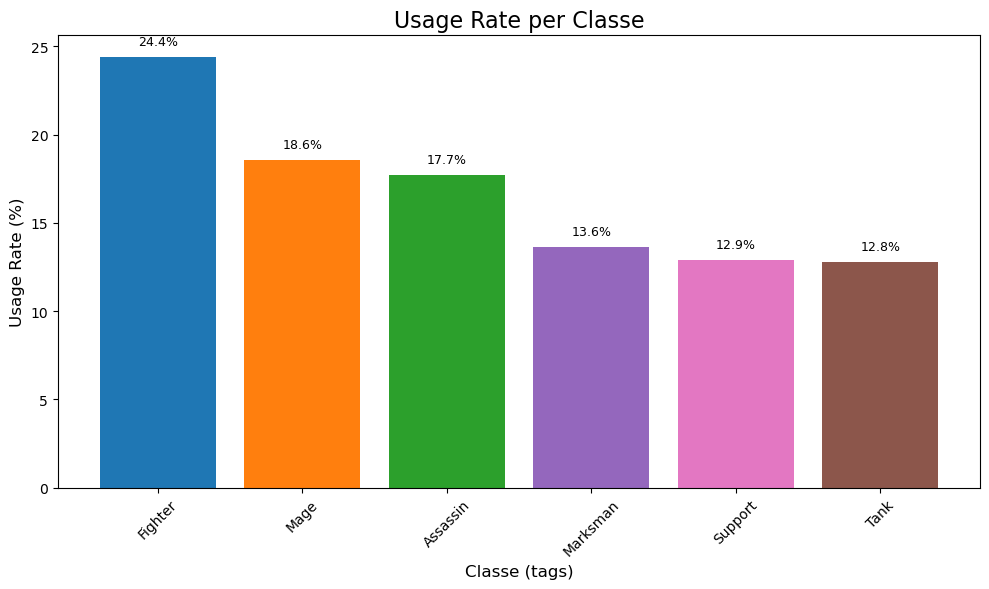

In [21]:
# Impostazioni base
plt.figure(figsize=(10, 6))

colori = ["#1f77b4", "#ff7f0e", "#2ca02c", "#9467bd", "#e377c2", "#8c564b"]
plt.bar(df_class_summary.index, df_class_summary["UsageRate"], color=colori)
# Titolo e assi
plt.title("Usage Rate per Classe", fontsize=16)
plt.xlabel("Classe (tags)", fontsize=12)
plt.ylabel("Usage Rate (%)", fontsize=12)
plt.xticks(rotation=45)

# Etichette sopra le barre
for i, val in enumerate(df_class_summary["UsageRate"]):
    plt.text(i, val + 0.5, f"{val:.1f}%", ha='center', va='bottom', fontsize=9)

# Mostra il grafico
plt.tight_layout()
plt.show()

## Regressione lineare tra UsageRate, BanRate e WinRate di un campione

- Date le statistiche trovate precedentemente, come:
    - `UsageRate`
    - `BanRate`
    - `WinRate`
   
   Abbiamo deciso di valutare se poteva avere senso applicare la regressione lineare sui dati ottenuti per
   creare ad esempio un modello di predizione dove dato un certo WinRate di un campione, si poteva stimare
   il suo BanRate e UsageRate.

 


In [22]:
from sklearn.linear_model import LinearRegression

col = ["id", "tags", "name", "title"]
class_championId = df_champions_nameID.loc[df_champions_nameID["id"] != -1, col]
class_championId.columns = ["champion_id", "tags", "name", "title"]
col_df = ["champion_id", "UsageRate", "BanRate", "winRateChamp",
           "name", "title"]

df_Usage_Ban = champ_stats[col_df].copy()

# Prepara i dati e i titoli
x_list = [
    df_Usage_Ban["UsageRate"],
    df_Usage_Ban["winRateChamp"],
    df_Usage_Ban["winRateChamp"]
]

y_list = [
    df_Usage_Ban["BanRate"],
    df_Usage_Ban["BanRate"],
    df_Usage_Ban["UsageRate"]
]

x_labels = ["Usage Rate (%)", "Win Rate (%)", "Win Rate (%)"]
y_labels = ["Ban Rate (%)", "Ban Rate (%)", "Usage Rate (%)"]
titles = [
    "Usage vs Ban Rate",
    "Win Rate vs Ban Rate",
    "Win Rate vs Usage Rate"
]

Creamo poi i grafici di tre modelli che potrebbero risultare d'interessere

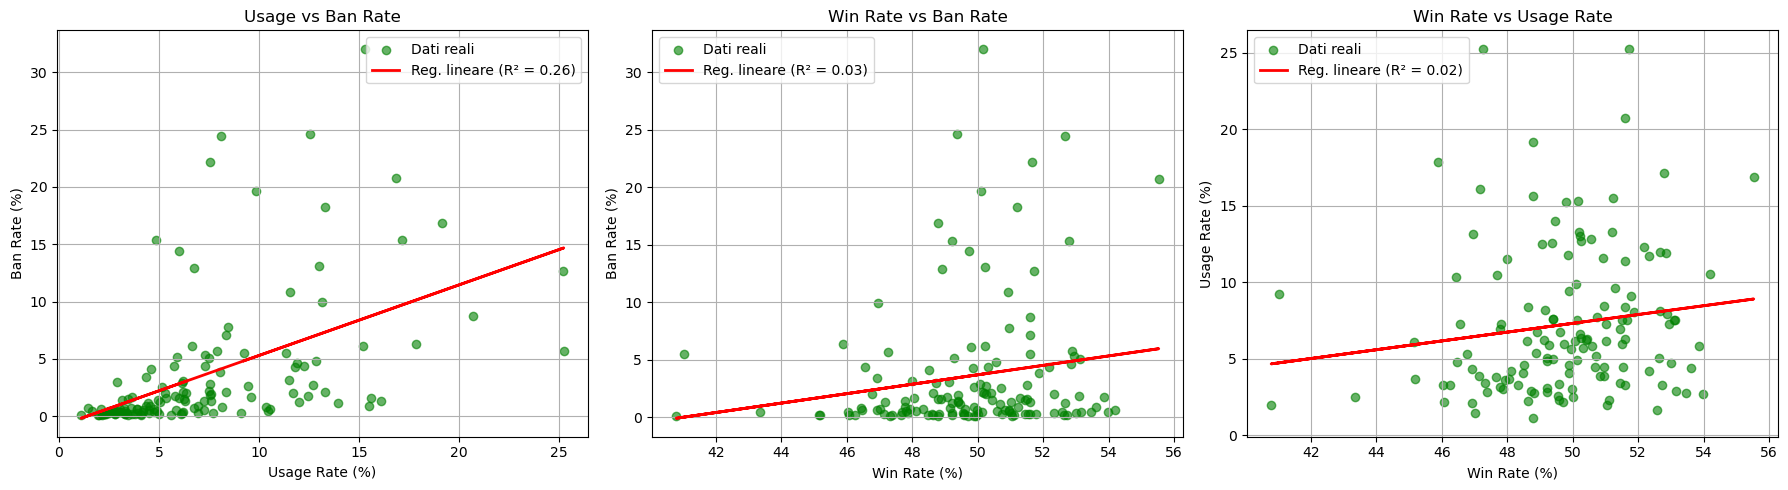

In [71]:
# Crea 3 subplot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i in range(3):
    ax = axes[i]
    x = x_list[i]
    y = y_list[i]
    X = x.values.reshape(-1, 1)
    
    # Fit modello di regressione
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    score = model.score(X, y)
    
    # Plot dati reali e retta di regressione
    ax.scatter(x, y, color="green", alpha=0.6, label="Dati reali")
    ax.plot(x, y_pred, color="red", linewidth=2, label=f"Reg. lineare (R² = {score:.2f})")
    
    ax.set_xlabel(x_labels[i])
    ax.set_ylabel(y_labels[i])
    ax.set_title(titles[i])
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

Come possiamo vedere, tutti i grafici hanno valori sparsi, perciò la correlazione tra questi dati è pressoché nulla o trascurabile.

In [24]:

#statistiche winrate
def statistics(dfCol):
    min_val = dfCol.min()
    max_val = dfCol.max()
    mean_val = dfCol.mean()
    var_val = dfCol.var()
    std_val = dfCol.std()
    
    # Output elegante
    
    print("-" * 40)
    print(f"Minimo           : {min_val:.2f}%")
    print(f"Massimo          : {max_val:.2f}%")
    print(f"Media            : {mean_val:.2f}%")
    print(f"Deviazione Std   : {std_val:.2f}")
    print(f"Varianza         : {var_val:.2f}")
    print("-" * 40)
    
print("Statistiche su Win Rate dei Campioni")
statistics(df_Usage_Ban["winRateChamp"])

Statistiche su Win Rate dei Campioni
----------------------------------------
Minimo           : 40.79%
Massimo          : 55.53%
Media            : 49.77%
Deviazione Std   : 2.40
Varianza         : 5.76
----------------------------------------


### Questo ci mostra che:
- `Il gioco è bilanciato`: la varianza nel winRate del personaggi è soltanto di 5.76
- `Ban Casuale`: I campioni più usati non sono per forza quelli che vengono bannati di più, probabilmente dipendono da fattori come l'apprezzamento, la strategia e la popolarità (o infamia) del personaggio stesso



## Correlazione tra early game champions e vittoria

Proviamo ora ad analizzare la durata di una partita

In [25]:
#statistiche winrate
winrate = games_data["gameDuration"]/60

min_val = winrate.min()
max_val = winrate.max()
mean_val = winrate.mean()
var_val = winrate.var()
std_val = winrate.std()

# Output elegante
print("Statistiche su Win Rate dei Campioni")
print("-" * 40)
print(f"Minimo           : {min_val:.2f}")
print(f"Massimo          : {max_val:.2f}")
print(f"Media            : {mean_val:.2f}")
print(f"Deviazione Std   : {std_val:.2f}")
print(f"Varianza         : {var_val:.2f}")
print("-" * 40)

Statistiche su Win Rate dei Campioni
----------------------------------------
Minimo           : 3.17
Massimo          : 78.80
Media            : 30.54
Deviazione Std   : 8.53
Varianza         : 72.82
----------------------------------------


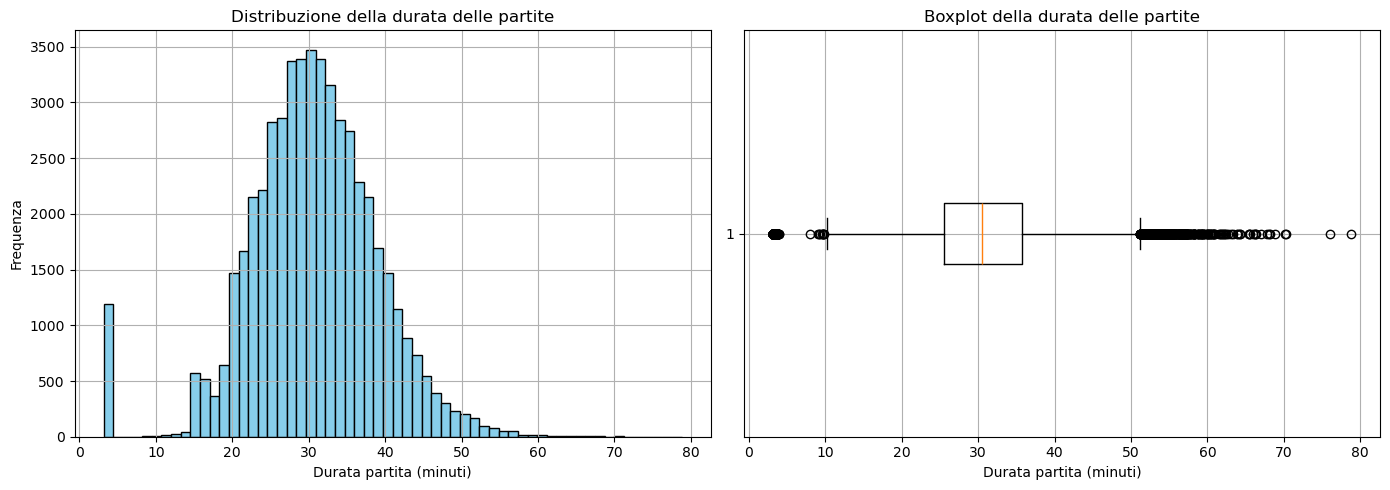

In [26]:
durate_min = games_data["gameDuration"] / 60  
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].hist(durate_min, bins=60, color="skyblue", edgecolor="black")
axes[0].set_title("Distribuzione della durata delle partite")
axes[0].set_xlabel("Durata partita (minuti)")
axes[0].set_ylabel("Frequenza")
axes[0].grid(True)
axes[1].boxplot(durate_min, vert=False)
axes[1].set_title("Boxplot della durata delle partite")
axes[1].set_xlabel("Durata partita (minuti)")
axes[1].grid(True)

plt.tight_layout()
plt.show()

Dal grafico possiamo osservare come la durata di una partita sia quasi assimilabile ad una curva di gauss, con picco a circa 30 minuti.
D'ora in avanti si considerino:
- `Partite veloci`: primo quartile (max 25 minuti)
- `Partite medie`: secondo e terzo quartile (min 25 e max 35 minuti)
- `Partite lunghe`: quarto quartile (min 35 minuti)

In [27]:
# Durata in minuti
durate = games_data["gameDuration"] / 60

# Calcola i quartili
q1 = durate.quantile(0.25)
q3 = durate.quantile(0.75)
q1.max()
condizioni = [
    durate <= q1,
    durate >= q3
]

etichette = ["Fast", "Long"]
games_data["DurataPartita"] = np.select(condizioni, etichette, default="Medium")

print(f"""
    Primo quartile: {q1:.2f}
    Terzo quartile: {q3:.2f}
""")


    Primo quartile: 25.52
    Terzo quartile: 35.80



## Assegnazioni dell'affinità dei personaggi in base alla durata della partita
Ora classifichiamo ciascun campione in base a quale percentuale di vittoria ha un campione nelle varie lunghezze di partita

es: Se un campione ha una percentuale di vittoria più alta nelle partite brevi, verrà etichettato come `Fast`

In [28]:
champ_cols = [
    't1_champ1id', 't1_champ2id', 't1_champ3id', 't1_champ4id', 't1_champ5id',
    't2_champ1id', 't2_champ2id', 't2_champ3id', 't2_champ4id', 't2_champ5id'
]

# Applichiamo melt per trasformare i 10 campioni in una colonna unica
champions_long = pd.melt(
    games_data,
    id_vars=["gameId", "gameDuration", "winner", "DurataPartita"],
    value_vars=champ_cols,
    var_name="team_slot",
    value_name="champion_id"
)
champions_long["is_win"] = (
    ((champions_long["winner"] == 1) & champions_long["team_slot"].str.startswith("t1")) |
    ((champions_long["winner"] == 2) & champions_long["team_slot"].str.startswith("t2"))
)

# Raggruppo per champion_id e durataPartita
winrate_by_durata = champions_long.groupby(["champion_id", "DurataPartita"])["is_win"].agg(["mean", "count"]).reset_index()
winrate_by_durata.rename(columns={"mean": "winrate", "count": "n_partite"}, inplace=True)

In [29]:
scaling_class = (
    winrate_by_durata.sort_values("winrate", ascending=False)
          .drop_duplicates(subset="champion_id")
          .set_index("champion_id")["DurataPartita"]
)

# Risultato: Series champion_id → 'early' / 'mid' / 'late'
scaling_class.name = "scaling_class"
scaling_class = scaling_class.reset_index().sort_values("scaling_class")
col_df = ["champion_id", "scaling_class", 
          "tags", "name", "title"]

scaling_class = scaling_class.merge(class_championId, on="champion_id", how="left")[col_df]

## Esempi delle tre classificazioni appena create:

In [30]:
scaling_class.loc[scaling_class["scaling_class"] == "Fast"].head(5)



,champion_id,scaling_class,tags,name,title
0,56,Fast,"[Assassin, Fighter]",Nocturne,the Eternal Nightmare
1,68,Fast,"[Fighter, Mage]",Rumble,the Mechanized Menace
2,43,Fast,"[Mage, Support]",Karma,the Enlightened One
3,58,Fast,"[Fighter, Tank]",Renekton,the Butcher of the Sands
4,19,Fast,"[Fighter, Tank]",Warwick,the Uncaged Wrath of Zaun


In [31]:
scaling_class.loc[scaling_class["scaling_class"] == "Medium"].head(5)


,champion_id,scaling_class,tags,name,title
109,104,Medium,[Marksman],Graves,the Outlaw
110,164,Medium,"[Fighter, Tank]",Camille,the Steel Shadow
111,136,Medium,"[Mage, Fighter]",Aurelion Sol,The Star Forger
112,127,Medium,[Mage],Lissandra,the Ice Witch
113,266,Medium,"[Fighter, Tank]",Aatrox,the Darkin Blade


In [32]:
scaling_class.loc[scaling_class["scaling_class"] == "Long"].head(5)

,champion_id,scaling_class,tags,name,title
57,24,Long,"[Fighter, Assassin]",Jax,Grandmaster at Arms
58,45,Long,[Mage],Veigar,the Tiny Master of Evil
59,77,Long,"[Fighter, Tank]",Udyr,the Spirit Walker
60,8,Long,"[Mage, Tank]",Vladimir,the Crimson Reaper
61,122,Long,"[Fighter, Tank]",Darius,the Hand of Noxus


## Aggiunta statistiche ulteriori per la partita
Ora creaimo una copia del dataSet principale con aggiunta di:
- `Classi dei campioni`: Per ciascuno dei campioni scelti viene mostrata l'affinità con la durata di partita
- `Conteggio campioni per affinità`: Per entrambe le squadre viene contato il numero di campioni per affinità
- `Conteggio obbiettivi`: Per entrambe le squadre viene contanto il numero di obbiettivi raggiunti

In [35]:
scaling_dict = dict(zip(scaling_class["champion_id"], scaling_class["scaling_class"]))

# Lista degli obiettivi "first" da considerare
first_obj_cols = ["firstBlood", "firstTower", "firstInhibitor", "firstBaron", "firstDragon"]
game_players_stats = games_data.copy() 
# Mappa le classi per ogni campione nei due team
for team in ["t1", "t2"]:
    for i in range(1, 6):
        game_players_stats[f"{team}_champ{i}_class"] = game_players_stats[f"{team}_champ{i}id"].map(scaling_dict)
    
    # Conta quanti campioni sono classificati come "early" per ciascuna squadra
    game_players_stats[f"{team}_early_count"] = sum(
        game_players_stats[f"{team}_champ{i}_class"] == "Fast" for i in range(1, 6)
    )
    game_players_stats[f"{team}_late_count"] = sum(
        game_players_stats[f"{team}_champ{i}_class"] == "Long" for i in range(1, 6)
    )
    game_players_stats[f"{team}_mid_count"] = sum(
        game_players_stats[f"{team}_champ{i}_class"] == "Medium" for i in range(1, 6)
    )

# Conta quanti obiettivi sono stati presi per primi da ciascun team
game_players_stats["t1_first_obj"] = sum(game_players_stats[col] == 1 for col in first_obj_cols)
game_players_stats["t2_first_obj"] = sum(game_players_stats[col] == 2 for col in first_obj_cols)

df_team_stats = game_players_stats[[
    "t1_early_count", "t1_first_obj",
    "t2_early_count", "t2_first_obj",
    "t1_late_count", "t2_late_count", 
    "t1_mid_count", "t2_mid_count", 
    "winner", "gameDuration"
]]

In [44]:
col = ["t1_champ1_class","t1_champ2_class",	"t1_champ3_class", "t1_champ4_class", "t1_champ5_class", "t2_champ1_class",	"t2_champ2_class",	"t2_champ3_class", "t2_champ4_class", "t2_champ5_class", "t1_early_count", "t2_early_count", "t1_first_obj", "t2_first_obj", "t1_late_count", "t2_late_count", "t1_mid_count", "t2_mid_count"]
game_players_stats[col].head(5)

,t1_champ1_class,t1_champ2_class,t1_champ3_class,t1_champ4_class,t1_champ5_class,t2_champ1_class,t2_champ2_class,t2_champ3_class,t2_champ4_class,t2_champ5_class,t1_early_count,t2_early_count,t1_first_obj,t2_first_obj,t1_late_count,t2_late_count,t1_mid_count,t2_mid_count
0,Long,Long,Medium,Long,Medium,Medium,Long,Long,Medium,Fast,0,1,4,1,3,2,2,2
1,Fast,Fast,Long,Long,Long,Medium,Fast,Fast,Long,Long,2,2,4,0,3,2,0,1
2,Medium,Medium,Medium,Fast,Long,Long,Fast,Fast,Long,Long,1,2,3,2,1,3,3,0
3,Fast,Fast,Long,Long,Fast,Medium,Fast,Fast,Long,Long,3,2,5,0,2,2,0,1
4,Fast,Long,Fast,Fast,Long,Long,Fast,Medium,Long,Fast,3,2,4,1,2,2,0,1


In [49]:
from scipy.stats import pearsonr

r1, _ = pearsonr(game_players_stats["t1_early_count"], game_players_stats["t1_first_obj"])
r2, _ = pearsonr(game_players_stats["t2_early_count"], game_players_stats["t2_first_obj"])

print(f"Correlazione Team 1: {r1:.2f}")
print(f"Correlazione Team 2: {r2:.2f}")


Correlazione Team 1: 0.05
Correlazione Team 2: 0.04


In [50]:
df_team1 = game_players_stats[[
    "t1_early_count", "t1_mid_count", "t1_late_count", "t1_first_obj", "winner"
]].copy()

df_team1.columns = ["early", "mid", "late", "first_obj", "winner"]
df_team1["team"] = "Team 1"
df_team1["is_win"] = df_team1["winner"] == 1

# Team 2
df_team2 = game_players_stats [[
    "t2_early_count", "t2_mid_count", "t2_late_count", "t2_first_obj", "winner"
]].copy()

df_team2.columns = ["early", "mid", "late", "first_obj", "winner"]
df_team2["team"] = "Team 2"
df_team2["is_win"] = df_team2["winner"] == 2

# Unisci e filtra solo i team vincenti
df_composizioni = pd.concat([df_team1, df_team2])
df_composizioni = df_composizioni[df_composizioni["is_win"]]

# (opzionale) rimuovi colonna "winner" e "is_win" se non ti servono più
df_composizioni = df_composizioni.drop(columns=["winner", "is_win"])

In [51]:
df_composizioni

,early,mid,late,first_obj,team
0,0,2,3,4,Team 1
1,2,0,3,4,Team 1
2,1,3,1,3,Team 1
3,3,0,2,5,Team 1
4,3,0,2,4,Team 1
...,...,...,...,...,...
51484,2,1,2,4,Team 2
51485,2,1,2,3,Team 2
51486,1,1,3,3,Team 2
51487,3,0,2,3,Team 2


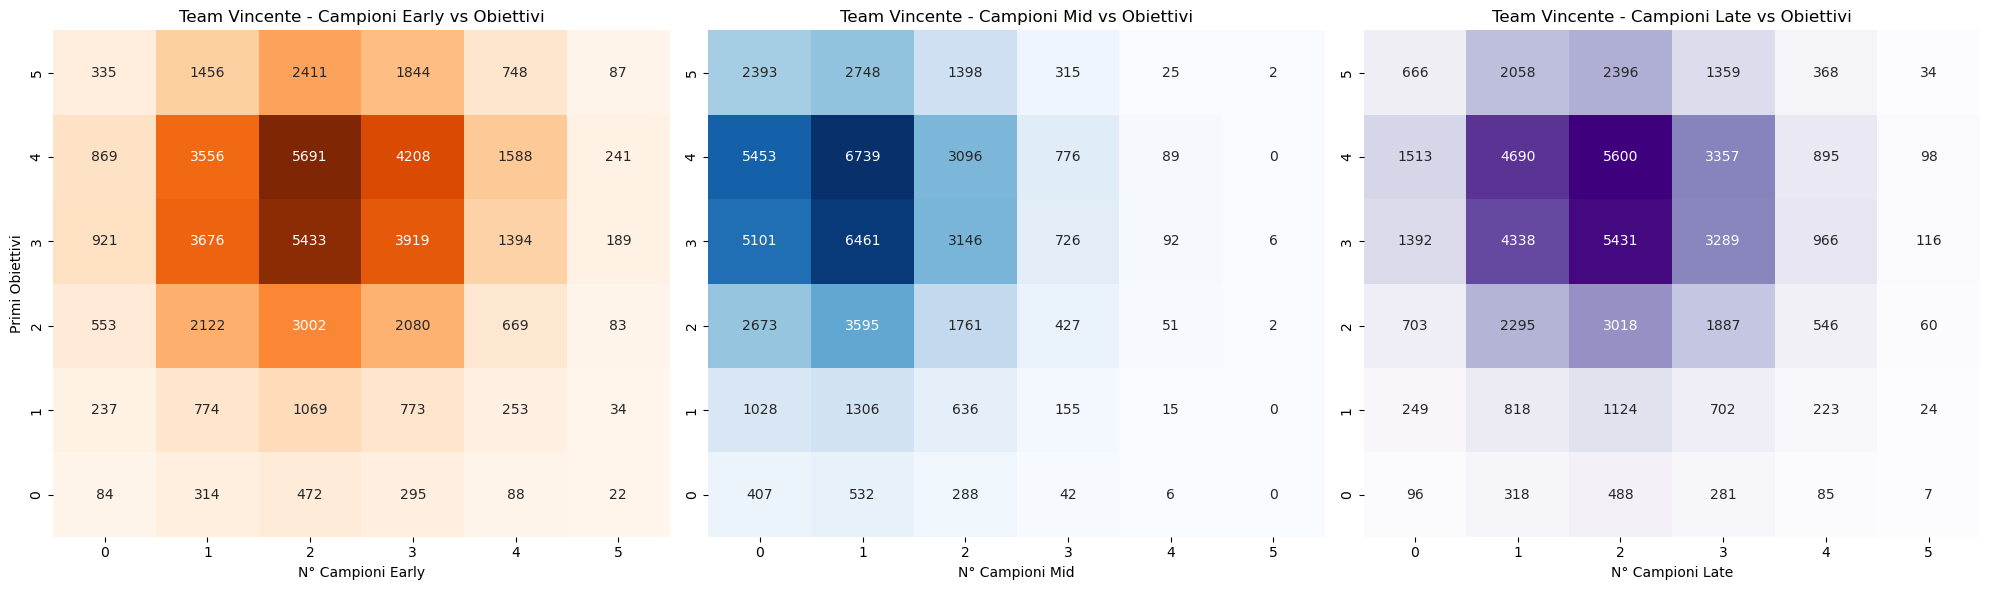

In [52]:
import seaborn as sns

# Setup figure con 3 subplot
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
categorie = ["early", "mid", "late"]
colori = ["Oranges", "Blues", "Purples"]

for i, cat in enumerate(categorie):
    # Prepara la tabella pivot da df_composizioni
    pivot = df_composizioni.pivot_table(
        index="first_obj",
        columns=cat,
        aggfunc="size",
        fill_value=0
    )

    # Heatmap su subplot
    ax = axes[i]
    sns.heatmap(pivot, annot=True, fmt="d", cmap=colori[i], ax=ax, cbar=False)
    ax.invert_yaxis()
    ax.set_title(f"Team Vincente - Campioni {cat.capitalize()} vs Obiettivi")
    ax.set_xlabel(f"N° Campioni {cat.capitalize()}")
    if i == 0:
        ax.set_ylabel("Primi Obiettivi")
    else:
        ax.set_ylabel("")

# Layout ordinato
plt.tight_layout()
plt.show()

Raggruppando per composizione di squadra, ci risulta che le squadre composte da due champion da early game e 3 champion da mid riescono a conquistare più obbiettivi mediamente. Andrebbe però notato che il numero di partite fatte con questa composizione è basso rispetto che con le altre composizioni, prima di trarre conclusioni definitive sarebbe ideale espandere il dataset.

In [72]:
# Raggruppa per composizione
grouped = df_composizioni.groupby(["early", "mid", "late"]).agg(
    n_partite=("first_obj", "count"),
    obiettivi_medi=("first_obj", "mean")
).reset_index()

# Ordina per efficacia
grouped = grouped.sort_values("obiettivi_medi", ascending=False)

# Mostra le top 10
print(grouped.head(10))


    early  mid  late  n_partite  obiettivi_medi
14      2    3     0        670        3.376119
18      4    0     1       3117        3.367982
19      4    1     0       1623        3.306839
20      5    0     0        656        3.301829
16      3    1     1       5942        3.258667
15      3    0     2       5658        3.258572
17      3    2     0       1519        3.253456
13      2    2     1       4092        3.237537
11      2    0     3       5120        3.214258
9       1    3     1       1229        3.200163


# Analisi della partita

Finita l'analisi dei campioni, ora condurremo un'analisi sulle proprietà di una partita, in particolare sull'importanza degli obbiettivi e di conseguenza sulle condizioni di vittoria.

# Probabilità di vittoria condizionata
Il gioco contiene molte variabili e offre innumerevoli opzioni a ciascun giocatore, questa analisi servirà a quantificare l'impatto che l'acquisizione degli obiettivi principali ha non solo sulla vittoria di una squadra, ma anche sull'acquisizione di altri obbiettivi (effetto palla di neve).

In seguito calcoliamo una matrice di correlazione sulle seguenti colonne:
- Winner
- First Blood
- First Tower
- First Inhibitor
- First Baron
- First Dragon
- First Rift Herald
- T1/T2 Has Dragon Soul
    
Possiamo fare varie osservazioni sui risultati:
1. Tutte le colonne inerenti ad un obiettivo ottenuto dalla squadra sono positivamente correlate con la vittoria

    Non tutti gli obbiettivi sono uguali però: La correlazione maggiore la possiamo osservare tra primo inhibitor e vittoria (0.72), mentre la correlazione tra vittoria e First Blood è nettamente inferiore (0.18). In seguito approfondiremo questa differenza.


In [57]:
corr_frame = games_data.copy()
columns = ['winner', 'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald', 't1_hasDragonSoul', 't2_hasDragonSoul']

# Trasformo i dati in modo da renderli più adatti all'analisi
ternary_map = {
    0: 0,
    1: 1,
    2: -1,
}

for column in columns[:-2]: # exclude soul columns
    corr_frame[column] = corr_frame[column].map(ternary_map)
    corr_frame[column] = corr_frame[column] == 1
    

corr_frame[columns].corr().style.format('{:.2f}', na_rep="")\
    .bar(align=0, vmin=-1, vmax=1, cmap="RdYlGn", height=50, width=60)

,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_hasDragonSoul,t2_hasDragonSoul
winner,1.00,0.18,0.41,0.72,0.39,0.34,0.22,0.14,-0.15
firstBlood,0.18,1.00,0.22,0.16,0.06,0.14,0.11,0.03,-0.02
firstTower,0.41,0.22,1.00,0.40,0.15,0.32,0.26,0.08,-0.08
firstInhibitor,0.72,0.16,0.40,1.00,0.42,0.32,0.24,0.16,-0.11
firstBaron,0.39,0.06,0.15,0.42,1.00,0.17,0.13,0.16,-0.02
firstDragon,0.34,0.14,0.32,0.32,0.17,1.00,0.19,0.21,-0.20
firstRiftHerald,0.22,0.11,0.26,0.24,0.13,0.19,1.00,0.06,-0.04
t1_hasDragonSoul,0.14,0.03,0.08,0.16,0.16,0.21,0.06,1.00,-0.05
t2_hasDragonSoul,-0.15,-0.02,-0.08,-0.11,-0.02,-0.20,-0.04,-0.05,1.00


La probabilità condizionale di eventi la cui probabilità è calcolabile come frazione "casi favorevoli" su "cardinalità insieme universo" può essere semplificata algebricamente nel seguente modo

$$ P(x) = \dfrac{\#EvtX}{\#\Omega} $$ 
$$ P(Win) = \dfrac{\#PartiteVinte}{\#\Omega} $$
$$ P(Win|x) = \dfrac{P(Win,x)}{P(x)} = \dfrac{\dfrac{\#(PartiteVinte \cap EvtX)}{\#\Omega}}{\dfrac{\#EvtX}{\#\Omega}} = \dfrac{\#(PartiteVinte \cap EvtX)}{\#EvtX} $$

In [58]:
# Calcola vittoria condizionata alla colonna on_column
def win_conditional_prob(data: pd.DataFrame, on_column: str):
    intersect_count = len(data[(data["winner"] == 1) & (data[on_column] == 1)])
    on_column_count = len(data[data[on_column] == 1])
    
    return intersect_count / on_column_count

Calcolando le probabilità di vittoria condizionate sulle colonne che avevamo scelto prima riusciamo a quantificare l'impatto di ciascun obbiettivo.
Tra queste notiamo
- First Blood (59%)

    Il primo sangue, pur essendo un'obbiettivo a prima apparenza scarsamente influente, aumenta la probabilità di vittora del 10%. Questo è probabilmente dovuto al fatto che il giocatore che ha ottenuto il primo sangue potrà potenziare il suo personaggio, il che può portare ad un effetto "palla di neve" dove il personaggio potenziato è più forte dei suoi nemici e li sconfigge con più facilità, portandolo a potenziarsi ulteriormente in un circolo vizioso di vantaggio e oppressione della squadra nemica.
- First Inhibitor (91%)

    La distruzione del primo inhibitor invece porta la squadra che lo ottiene ad una probabilità enorme di vittoria. A differenza del primo sangue però, questo dato è da contestualizzare meglio.
    Nonostante i calcoli ci hanno permesso di concludere che la squadra che ha distrutto il primo inhibitor ha la probabilità del 91% di vincere, bisogna considerare che il fatto che una squadra sia arrivata a tale impresa significa che aveva già un vantaggio significativo sul nemico, e di conseguenza sarebbe da chiarire che la probabilità di vittoria della squadra sarebbe stata altrettanto alta anche prima che sia avvenuta la distruzione del primo inhibitor.


In [59]:
win_probabilities = pd.DataFrame(
    {
        column: win_conditional_prob(games_data, column) for column in columns[1:]
    }, index=["Win Rate"]
)
win_probabilities.style.format('{:.2f}')\
    .bar(align=0, vmin=0, vmax=1, cmap="YlGn", height=50, width=50)

,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_hasDragonSoul,t2_hasDragonSoul
Win Rate,0.59,0.71,0.91,0.81,0.69,0.69,0.82,0.18


Ottenuti questi dati, ora proviamo a fare un modello di predizione di vittoria. Il modello Naive Bayes è fondato sulla presunzione che i suoi parametri sono variabili indipendenti tra di loro, non è il caso con le nostre variabili ma è risaputo che il modello riesce a performare bene anche altrimenti.

Allenato il modello riusciamo ad ottenere un f1 score soddisfacente (0.874280912675328) 

In [60]:
# Naive Bayes model for predicting win based on objectives

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score

model_data = games_data.copy()

model_columns = columns[1:] + ["t1_dragonKills", "t2_dragonKills", "t1_baronKills", "t2_baronKills"]

X, y = (games_data[model_columns], games_data["winner"] == 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
win_predictor = GaussianNB()
y_pred = win_predictor.fit(X_train, y_train).predict(X_test)

f1_score(y_test, y_pred)  n   

0.874280912675328

In seguito la sua learning curve del modello. Il veloce approccio del learning score al training score ci porta a concludere che il modello non è stato overfittato.

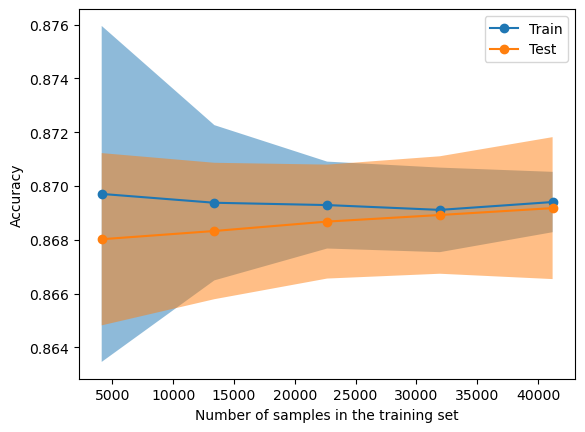

In [61]:
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

# learning score e training score

LearningCurveDisplay.from_estimator(
    win_predictor, 
    X = X, 
    y = y,
    train_sizes = np.linspace(0.1, 1.0, 5),
    cv = ShuffleSplit(n_splits=25, test_size=0.2, random_state=0),
    score_type = "both",
    n_jobs = 4,
    line_kw = {"marker": "o"},
    std_display_style = "fill_between",
    score_name = "Accuracy",
)

# Conclusioni

League of Legends è un gioco estremamente sofisticato, non per caso è oggetto di varie competizioni di eSport in giro per il mondo. La sua complessità assieme alla varietà dei campioni giocabili lo rende uno dei giochi competitivi più popolari al mondo. Nonostante la sua sofisticazione il suo concetto è chiaro: Una squadra che ottiene un vantaggio iniziale è statisticamente probabile che riesca a capitalizzare sul suo vantaggio e vincere la partita.